In [1]:
#● (5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c)
#organize (e.g., set up a database or a pandas DataFrame).
#● (20 points) Basic data exploration and summary statistics
#○ You must present three conclusions using at least three different statistical
#methods including hypothesis testing.
#■ For example: What are the main characteristics of your dataset? How
#many features and entries are there? Is a feature over-represented? Are
#features correlated? Are there outliers? Identify the attributes that will
#affect your choice of primary analysis technique. Etcetera.
#○ For each method, you must have at least one gorgeous plot.

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

os.environ['KAGGLE_CONFIG_DIR'] = './kaggle.json'

api = KaggleApi()
api.authenticate()

download_path = "/Users/debarshidey/Desktop/CMSC320"

api.dataset_download_files("rohanrao/formula-1-world-championship-1950-2020", path=download_path, unzip=True)

print("Download completed!")


Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
Download completed!


In [3]:
import pandas as pd

circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

circuits = circuits[['circuitId', 'name', 'location', 'country']]
constructor_results = constructor_results[['constructorId', 'raceId', 'points']]
constructor_standings = constructor_standings[['constructorId', 'raceId', 'points']]
constructors = constructors[['constructorId', 'name', 'nationality']]
driver_standings = driver_standings[['driverId', 'raceId', 'points', 'position']]
drivers = drivers[['driverId', 'driverRef', 'forename', 'surname', 'dob', 'nationality']]
lap_times = lap_times[['raceId', 'driverId', 'lap', 'time']]
pit_stops = pit_stops[['raceId', 'driverId', 'stop', 'lap', 'duration']]
qualifying = qualifying[['raceId', 'driverId', 'constructorId', 'position']]
races = races[['raceId', 'year', 'round', 'circuitId', 'name', 'date']]
results = results[['raceId', 'driverId', 'constructorId', 'position', 'points', 'laps']]
sprint_results = sprint_results[['raceId', 'driverId', 'constructorId', 'position', 'points']]
status = status[['statusId', 'status']]

drivers

,driverId,driverRef,forename,surname,dob,nationality
0,1,hamilton,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,Nico,Rosberg,1985-06-27,German
3,4,alonso,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...
854,856,de_vries,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,Oscar,Piastri,2001-04-06,Australian
856,858,sargeant,Logan,Sargeant,2000-12-31,American
857,859,lawson,Liam,Lawson,2002-02-11,New Zealander


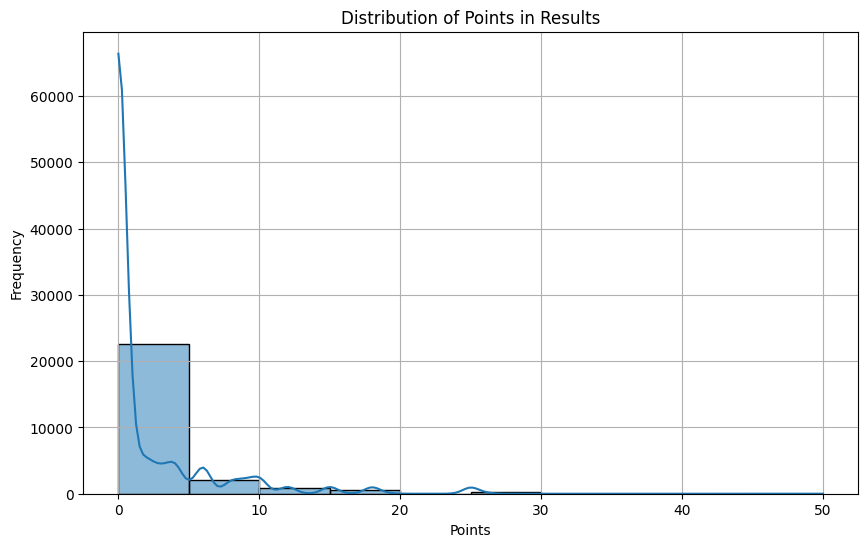

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(results['points'], bins=10, kde=True)
plt.title('Distribution of Points in Results')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid()
plt.show()

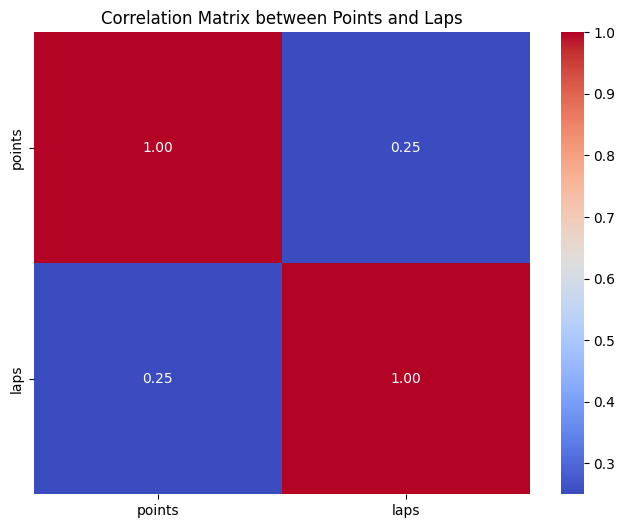

In [5]:
correlation_matrix = results[['points', 'laps']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Points and Laps')
plt.show()

In [6]:
from scipy import stats

constructor_a_points = results[results['constructorId'] == 1]['points']
constructor_b_points = results[results['constructorId'] == 2]['points']

t_stat, p_value = stats.ttest_ind(constructor_a_points, constructor_b_points)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    conclusion = "reject the null hypothesis"
else:
    conclusion = "fail to reject the null hypothesis"

print(f"Conclusion: We {conclusion} that the average points differ between Constructor A and Constructor B.")


T-statistic: 3.2176923054789794, P-value: 0.0013125541781412286
Conclusion: We reject the null hypothesis that the average points differ between Constructor A and Constructor B.
